In [67]:
# Import packages and datasets
import cv2
import numpy as np
import matplotlib.pyplot as plt

(2454, 3272, 3)

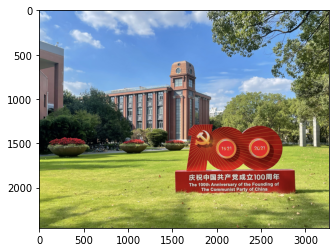

In [68]:
# Plot Img
img = cv2.imread("Xuhui Campus.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

In [69]:
# SVD
def SVD(image):
    U, S, VT = np.linalg.svd(image)
    return U, S, VT

In [70]:
# Image Rebuild
def rebuild(num, U, S, VT):
    img_re = U[:, :num].dot(np.diag(S[:num])).dot(VT[:num, :])
    return img_re

In [71]:
# Error Compute
def error(img, img_re):
    error = np.sqrt(np.sum(img - img_re) ** 2)
    return error

((2454, 2454), (2454,), (3272, 3272))

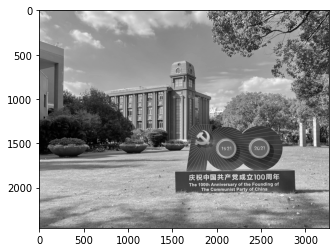

In [72]:
# Grey
img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_grey, cmap='gray')
U_g, S_g, VT_g = SVD(img_grey)
U_g.shape, S_g.shape, VT_g.shape

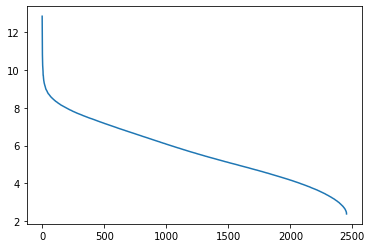

In [73]:
plt.plot(np.log(S_g))

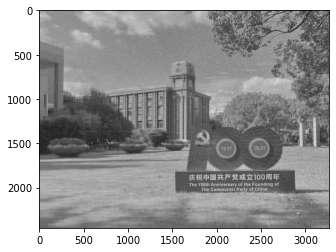

In [74]:
img_grey_re = rebuild(98, U_g, S_g, VT_g)
plt.imshow(img_grey_re, cmap="gray")

In [75]:
err_g = error(img_grey, img_grey_re)
err_g


326.5112627129046

In [76]:
# Color
# R
U_r, S_r, VT_r = SVD(img[:, :, 0])
img_red_re = rebuild(80, U_r, S_r, VT_r)
img_red_re = img_red_re.astype(int)
# G
U_gr, S_gr, VT_gr = SVD(img[:, :, 1])
img_green_re = rebuild(80, U_gr, S_gr, VT_gr)
img_green_re = img_green_re.astype(int)
# B
U_b, S_b, VT_b = SVD(img[:, :, 2])
img_blue_re = rebuild(80, U_b, S_b, VT_b)
img_blue_re = img_blue_re.astype(int)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2454, 3272, 3)


11927935.0

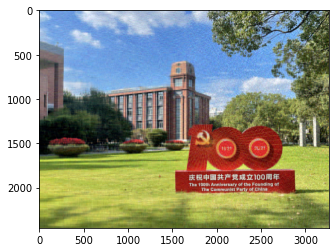

In [77]:
# Build RGB together
img_re = np.stack((img_red_re, img_green_re, img_blue_re), axis=2)
print(img_re.shape)
plt.imshow(img_re, vmax=255, vmin=0)
err_c = error(img, img_re)
err_c